In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
from src.process import Process, CBowModel, IDEAData
from src.config import Config
from src.cluster import ClusterModel

In [2]:
cfg = Config()

In [3]:
idea = IDEAData(cfg('data'))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.597 seconds.
Prefix dict has been built succesfully.


In [4]:
cm = ClusterModel(cfg('data'), idea)
cm.fit()

In [5]:
res = cm.cal_center_distance()

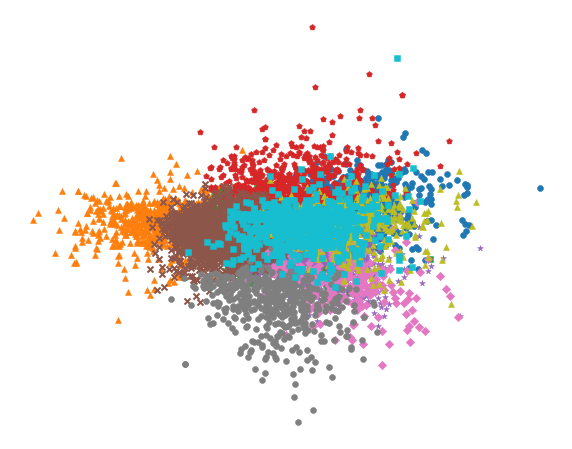

In [7]:
cm.plot_point()

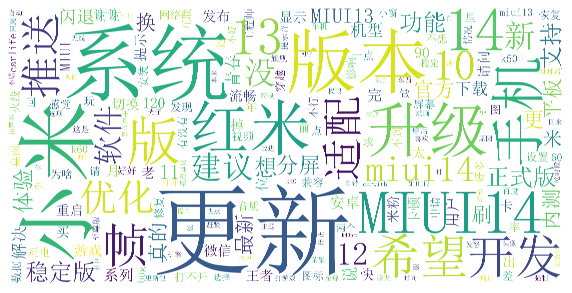

In [8]:
cm.plot_word_cloud(1)

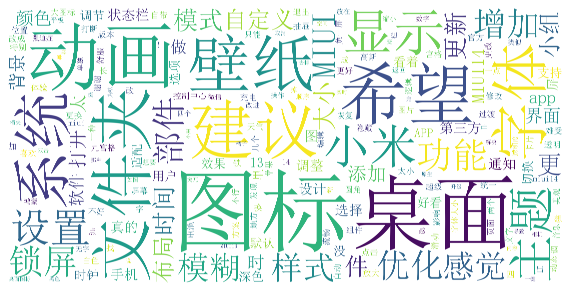

In [10]:
cm.plot_word_cloud(3)

In [7]:
from collections import Counter

In [8]:
Counter(cm.model.labels_)

Counter({8: 864,
         3: 2314,
         7: 630,
         0: 1270,
         1: 713,
         4: 472,
         9: 486,
         5: 234,
         2: 848,
         6: 729})

In [9]:
res

array([0.62000508, 0.23132005, 0.52787073, ..., 0.1753457 , 0.35926422,
       0.34870934])

In [10]:
import pandas as pd

In [12]:
df = cm.idea.process.df.copy()

In [13]:
df['label'] = cm.model.labels_
df['distance'] = res

In [15]:
df['label'].value_counts()

3    2314
0    1270
8     864
2     848
6     729
1     713
7     630
9     486
4     472
5     234
Name: label, dtype: int64

In [24]:
def top_n(group, n=5, col='distance'):
    return group.sort_values(by=col, ascending=False).head(n)

In [29]:
df.groupby('label').apply(top_n).to_csv('../result/test.csv', encoding='utf_8_sig')